## Amazon Polly

* Transcribe: 음성,영상 등 미디어파일을 텍스트로 변환하는 서비스입니다. 
* Polly: 텍스트를 음성으로 변화하는 서비스입니다. 
    * 28개 언어 지원
    * 남성, 여성 목소리 지원, 양쪽 변환 가능
    * 목소리에 대한 식별자를 **보이스ID**라고 함.
    * 단어에 특수한 발음이 있는 경우 **발음 렉시콘**을 사용해 커스터마이즈 가능
    * 변환된 음성은 S3의 버킷에 저장되거나 스트리밍 데이터로 획득가능
    * AmazonPollyFullAccess,AmazonS3FullAccess 권한 필요

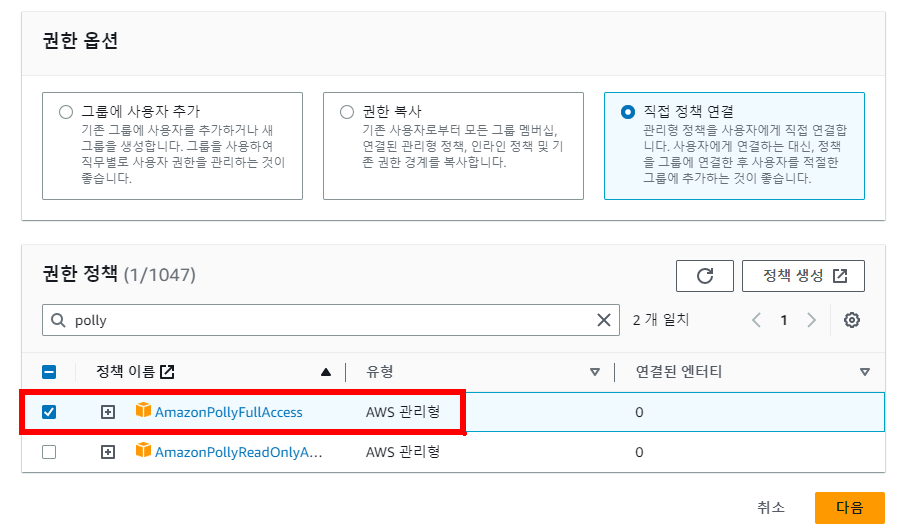

### 1.텍스트를 한국어 음성으로 변환

In [1]:
import boto3
import json

client = boto3.client('polly', region_name='ap-northeast-2')

text = '안녕하세요. 저는 AmazonPolly 서연입니다.'

response = client.start_speech_synthesis_task(
    OutputFormat='mp3', #<mp3 / ogg_vorbis / pcm 중 하나>
    OutputS3BucketName='awsaitest', #bucket명
    Text=text,
   VoiceId='Seoyeon'
 )

response

{'ResponseMetadata': {'RequestId': '8fb826ea-b365-42c3-b63d-46672b464179',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '8fb826ea-b365-42c3-b63d-46672b464179',
   'content-type': 'application/json',
   'content-length': '449',
   'date': 'Tue, 04 Apr 2023 03:40:40 GMT'},
  'RetryAttempts': 0},
 'SynthesisTask': {'TaskId': '4312afbd-8d3b-4055-9b91-e0e6c05b44de',
  'TaskStatus': 'scheduled',
  'OutputUri': 'https://s3.ap-northeast-2.amazonaws.com/awsaitest/4312afbd-8d3b-4055-9b91-e0e6c05b44de.mp3',
  'CreationTime': datetime.datetime(2023, 4, 4, 12, 40, 40, 345000, tzinfo=tzlocal()),
  'RequestCharacters': 28,
  'OutputFormat': 'mp3',
  'TextType': 'text',
  'VoiceId': 'Seoyeon'}}

> 비동기식 처리이므로, TaskStatus가 'scheduled'로 표시됨.

> 아래와 같이 별도의 get함수를 통해 결과를 확인할 수 있다.

> get함수의 결과에서 TaskStatus가 'completed'됨을 알 수 있다.

In [2]:
# S3bucket에 저장된 음성을 출력하기

taskid = response['SynthesisTask']['TaskId']

res = client.get_speech_synthesis_task(TaskId=taskid)
res


{'ResponseMetadata': {'RequestId': 'a8451f36-b4fd-48e0-9dd5-388c94619024',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'a8451f36-b4fd-48e0-9dd5-388c94619024',
   'content-type': 'application/json',
   'content-length': '449',
   'date': 'Tue, 04 Apr 2023 03:40:42 GMT'},
  'RetryAttempts': 0},
 'SynthesisTask': {'TaskId': '4312afbd-8d3b-4055-9b91-e0e6c05b44de',
  'TaskStatus': 'scheduled',
  'OutputUri': 'https://s3.ap-northeast-2.amazonaws.com/awsaitest/4312afbd-8d3b-4055-9b91-e0e6c05b44de.mp3',
  'CreationTime': datetime.datetime(2023, 4, 4, 12, 40, 40, 345000, tzinfo=tzlocal()),
  'RequestCharacters': 28,
  'OutputFormat': 'mp3',
  'TextType': 'text',
  'VoiceId': 'Seoyeon'}}

> 콘솔창에서 S3에 생성된 mp3객체를 다운받거나 실행시켜 확인할 수 있다.

### polly 동기식 실행

In [4]:
import boto3

polly_client = boto3.Session(
                aws_access_key_id='', # id와 패스워드 노출 조심할 것               
                aws_secret_access_key='',
                region_name='ap-northeast-2').client('polly')

response = polly_client.synthesize_speech(VoiceId='Seoyeon',
                OutputFormat='mp3', 
                Text = '안녕하세요. 저는 AmazonPolly 서연입니다.',
                Engine = 'neural')

file = open('speech.mp3', 'wb')
file.write(response['AudioStream'].read())
file.close()

